# Part-1 - Sentiment Analysis on IMDB Movie set

In [1]:
# import numpy as np
from matplotlib import pyplot as plt
plt.style.use('dark_background')
from tensorflow.keras.datasets import imdb

In [2]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense

In [3]:
# Keeping only the top 10,000 most frequently occuring words in the training set

num_words = 10000

In [6]:
import numpy as np
old = np.load


In [7]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=num_words)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\VISNN\Anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\VISNN\Anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant

In [8]:
print("Training entries: {}, labels: {}".format(len(X_train), len(y_train)))

Training entries: 25000, labels: 25000


In [9]:
print(X_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [10]:
# create a function to understand what the original text is
word_index= imdb.get_word_index()
# The first indices are reserved
word_index_1 = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"]=0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

# Now Reverse the word index to obtain a dict mapping indices to words
reverse_word_index=dict([(value,key)for (key,value) in word_index.items()])

# define the function to decode the sentences:
def decode_review(text):
    return ' '.join([reverse_word_index.get(i,'?') for i in text])

In [11]:
decode_review(X_train[1])

"<START> thought solid thought senator do making to is spot nomination assumed while he of jack in where picked as getting on was did hands fact characters to always life thrillers not as me can't in at are br of sure your way of little it strongly random to view of love it so principles of guy it used producer of where it of here icon film of outside to don't all unique some like of direction it if out her imagination below keep of queen he diverse to makes this stretch <UNK> of solid it thought begins br senator <UNK> budget worthwhile though ok <UNK> awaiting for ever better were <UNK> diverse for budget look kicked any to of making it out <UNK> follows for effects show to show cast this family us scenes more it severe making senator to <UNK> finds tv tend to of emerged these thing wants but <UNK> an beckinsale cult as it is video do you david see scenery it in few those are of ship for with of wild to one is very work dark they don't do dvd with those them"

In [12]:
# It is to be ensured that the movie reviews are the same length before attempting
# to feed them in to neural network
# as we can see below the the length of the first set and second train set are
# different

len(X_train[0]),len(X_train[1])

(218, 189)

In [13]:
# Now let us pad the sentences of uniform lengths of about 256 for X_train
X_train = pad_sequences(X_train,value=word_index["<PAD>"], padding ='post',maxlen=256)

In [14]:
# Now let us pad the sentences of uniform lengths of about 256 for X_test

X_test = pad_sequences(X_test,value=word_index["<PAD>"], padding ='post',maxlen=256)

In [15]:
len(X_train[0]),len(X_train[1])

(256, 256)

In [16]:
# Adding a simple sequential model to train a neural network and predict 

In [17]:
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense

model = Sequential()
model.add(Embedding(num_words, output_dim=32, input_length=256))

model.add(GlobalAveragePooling1D())
model.add(Dense(16,activation='relu'))
model.add(Dense(16,activation='relu'))

model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 256, 32)           320000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                528       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 320,817
Trainable params: 320,817
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [19]:
history = model.fit(X_train,y_train, epochs=20,batch_size=512,validation_split=0.1,shuffle=True)

Epoch 1/20
44/44 [==============================] - 3s 37ms/step - loss: 0.6910 - accuracy: 0.5253 - val_loss: 0.6767 - val_accuracy: 0.7244
Epoch 2/20
44/44 [==============================] - 1s 24ms/step - loss: 0.6627 - accuracy: 0.7396 - val_loss: 0.6036 - val_accuracy: 0.7976
Epoch 3/20
44/44 [==============================] - 1s 31ms/step - loss: 0.5643 - accuracy: 0.8162 - val_loss: 0.4629 - val_accuracy: 0.8276
Epoch 4/20
44/44 [==============================] - 1s 30ms/step - loss: 0.4065 - accuracy: 0.8690 - val_loss: 0.3551 - val_accuracy: 0.8676
Epoch 5/20
44/44 [==============================] - 1s 24ms/step - loss: 0.3035 - accuracy: 0.8949 - val_loss: 0.3123 - val_accuracy: 0.8776
Epoch 6/20
44/44 [==============================] - 1s 27ms/step - loss: 0.2457 - accuracy: 0.9131 - val_loss: 0.2938 - val_accuracy: 0.8860
Epoch 7/20
44/44 [==============================] - 1s 25ms/step - loss: 0.2106 - accuracy: 0.9255 - val_loss: 0.2874 - val_accuracy: 0.8840
Epoch 8/20
44

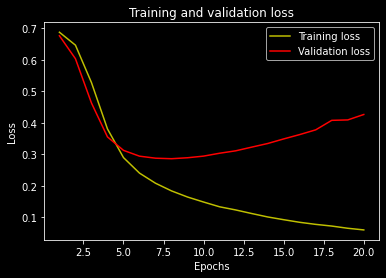

In [20]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

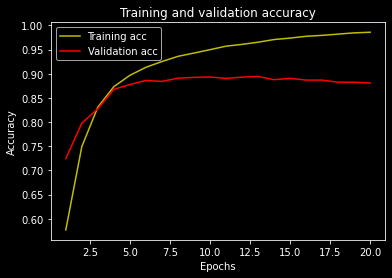

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [22]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(test_acc)

782/782 [==============================] - 1s 1ms/step - loss: 0.4550 - accuracy: 0.8622
0.8622000217437744


In [23]:
import string
from tensorflow.keras.preprocessing import sequence
word_dict = imdb.get_word_index()
top_words =10000
max_review_length =256

In [24]:
def analyze(text):
    # Prepare the input by removing punctuation characters, converting
    # characters to lower case, and removing words containing numbers
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)
    text = text.lower().split(' ')
    text = [word for word in text if word.isalpha()]

    # Generate an input tensor
    input = [1]
    for word in text:
        if word in word_dict and word_dict[word] < top_words:
            input.append(word_dict[word])
        else:
            input.append(2)
    padded_input = sequence.pad_sequences([input], maxlen=max_review_length)

    # Invoke the model and return the result
    result = model.predict(np.array([padded_input][0]))[0][0]
    return result


In [25]:
analyze('Easily the most stellar experience I have ever had.')

0.50408816

In [26]:
analyze('Easily the best experience I have ever had.')

0.49735835

In [27]:
analyze('I had a really bad experience with the customer service.')

0.3281213

In [28]:
analyze('I had a neutral experience')

0.24642101

# Part -2 Sarcasm Detection

In [37]:
import os
import json

In [38]:
#Loading Json Fileimport json

rows=[]
for line in open ('Sarcasm_Headlines_Dataset.json','r'):
     rows.append(json.loads(line))

In [39]:
# Shuffling the data and splitting the data in to the training and test sets:
import random
SPLIT_SIZE = 0.9
shuffled_set= random.sample(rows,len(rows))
train_length=int(len(shuffled_set)*SPLIT_SIZE)
train_set=shuffled_set[:train_length]
test_set=shuffled_set[train_length:]

In [40]:
#Data Summary:
print('Total Length of the dataset: ', len(shuffled_set))
print('Length of the Training Dataset: ',len(train_set))
print('Length of the Test dataset: ', len(test_set))

Total Length of the dataset:  26709
Length of the Training Dataset:  24038
Length of the Test dataset:  2671


In [41]:
train_set[1000]

{'article_link': 'https://local.theonion.com/turtle-bocce-balled-around-1819591772',
 'headline': 'turtle bocce balled around',
 'is_sarcastic': 1}

In [42]:
stopwords=[ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]

In [43]:
#Function to remove stopwords
def remove_stopwords(sentence):
    for word in stopwords:
        token=' '+word+' '
        sentence=sentence.replace(token,' ')
        sentence=sentence.replace('  ',' ')
    return sentence

#Function to get the plain text from the link of an article
def get_article(link):
 try:
    from bs4 import BeautifulSoup
    import urllib.request

    user_agent = 'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.9.0.7) Gecko/2009021910 Firefox/3.0.7'

    url = link

    headers={'User-Agent':user_agent,} 

    request=urllib.request.Request(url,None,headers) #The assembled request
    response = urllib.request.urlopen(request)
    html= response.read()
    soup = BeautifulSoup(html)

    # kill all script and style elements
    for script in soup(["script", "style"]):
        script.extract()    # rip it out

    # get text
    text = soup.get_text()

    # break into lines and remove leading and trailing space on each
    lines = (line.strip() for line in text.splitlines())
    # break multi-headlines into a line each
    chunks = (phrase.strip() for line in lines for phrase in line.split("  "))
    # drop blank lines
    text = '\n'.join(chunk for chunk in chunks if chunk)
    return ' '.join(text.split())
 except:
    return 'article not available'
    pass

In [44]:
# Function to separate the articles, headlines and lables from the data

def extract(array):
    headlines=[]
    labels=[]
    for i in range(len(array)):
        labels.append(array[i]['is_sarcastic'])
        headlines.append(remove_stopwords(array[i]['headline']))
    return headlines,labels

In [45]:
#Extracting the training and testing headlines for the word embedding:
train_headlines, train_labels = extract(train_set)
test_headlines,test_labels = extract(test_set)

In [46]:
import numpy as np
train_headlines =np.array(train_headlines)
train_labels = np.array(train_labels)
test_headlines=np.array(test_headlines)
test_labels=np.array(test_labels)

In [47]:
#Preprocessing the training and testing headlines for the word embedding
vocab_size=10000
embedding_dim=16
max_length= 120
trunc_type = 'post'
oov_tok="<OOV>"



In [48]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_headlines)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(train_headlines)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)
padded= np.array(padded)
test_sequences = tokenizer.texts_to_sequences(test_headlines)
test_sequences= np.array(test_sequences)
test_padded = pad_sequences(test_sequences,maxlen=max_length)
test_padded=np.array(test_padded)

<ipython-input-48-30eeeed94951>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  test_sequences= np.array(test_sequences)


# CONVOLUTIONAL NEURAL NETWORK (CNN)

In [49]:
#Building the CNN Model
model_conv = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(16,3,activation='relu'),
    tf.keras.layers.MaxPooling1D(2),
    #tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [50]:
model_conv.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
conv1d (Conv1D)              (None, 118, 16)           784       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 59, 16)            0         
_________________________________________________________________
flatten (Flatten)            (None, 944)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 5670      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 7         
Total params: 166,461
Trainable params: 166,461
Non-trainable params: 0
________________________________________________

In [51]:
model_conv.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
num_epochs = 20
history_conv=model_conv.fit(padded, train_labels, epochs=num_epochs, validation_data=(test_padded, test_labels))

Epoch 1/20
752/752 [==============================] - 6s 6ms/step - loss: 0.6381 - accuracy: 0.6104 - val_loss: 0.4545 - val_accuracy: 0.8225
Epoch 2/20
752/752 [==============================] - 4s 5ms/step - loss: 0.3891 - accuracy: 0.8639 - val_loss: 0.3996 - val_accuracy: 0.8401
Epoch 3/20
752/752 [==============================] - 4s 5ms/step - loss: 0.2717 - accuracy: 0.9140 - val_loss: 0.4007 - val_accuracy: 0.8360
Epoch 4/20
752/752 [==============================] - 4s 5ms/step - loss: 0.1785 - accuracy: 0.9404 - val_loss: 0.4281 - val_accuracy: 0.8368
Epoch 5/20
752/752 [==============================] - 4s 5ms/step - loss: 0.1234 - accuracy: 0.9620 - val_loss: 0.4982 - val_accuracy: 0.8353
Epoch 6/20
752/752 [==============================] - 4s 5ms/step - loss: 0.0860 - accuracy: 0.9781 - val_loss: 0.5921 - val_accuracy: 0.8308
Epoch 7/20
752/752 [==============================] - 4s 5ms/step - loss: 0.0566 - accuracy: 0.9858 - val_loss: 0.6364 - val_accuracy: 0.8341
Epoch 

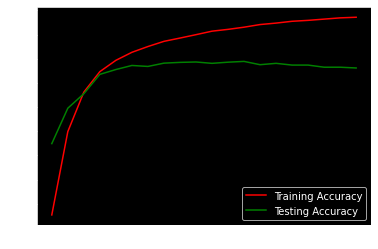

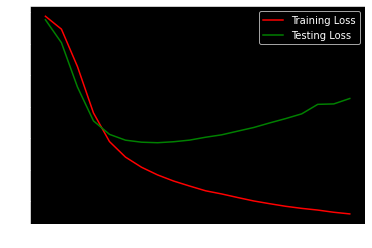

In [52]:

#Evaluating Accuracy and Loss of the model
%matplotlib inline
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) #No. of epochs

#Plot training and validation accuracy per epoch
import matplotlib.pyplot as plt
plt.plot(epochs,acc,'r',label='Training Accuracy')
plt.plot(epochs,val_acc,'g',label='Testing Accuracy')
plt.legend()
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs,loss,'r',label='Training Loss')
plt.plot(epochs,val_loss,'g',label='Testing Loss')
plt.legend()
plt.show()

# Bidirectional GATED Recurrent Unit (GRU)

In [58]:
# Building the GRU Model

model_gru = tf.keras.Sequential([tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length),
                                tf.keras.layers.Bidirectional(tf.keras.layers.GRU(16)),
                                tf.keras.layers.Dense(6, activation='relu'),
                                tf.keras.layers.Dense(1,activation='sigmoid')
                                ])

In [59]:
model_gru.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 32)                3264      
_________________________________________________________________
dense_7 (Dense)              (None, 6)                 198       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 7         
Total params: 163,469
Trainable params: 163,469
Non-trainable params: 0
_________________________________________________________________


In [60]:
model_gru.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
num_epochs=20
history1= model_gru.fit(padded, train_labels,batch_size=512,epochs=num_epochs,validation_data=(test_padded,test_labels))

Epoch 1/20
47/47 [==============================] - 36s 699ms/step - loss: 0.6886 - accuracy: 0.5506 - val_loss: 0.6781 - val_accuracy: 0.5616
Epoch 2/20
47/47 [==============================] - 35s 735ms/step - loss: 0.6570 - accuracy: 0.5919 - val_loss: 0.4832 - val_accuracy: 0.7776
Epoch 3/20
47/47 [==============================] - 34s 735ms/step - loss: 0.4274 - accuracy: 0.8156 - val_loss: 0.3968 - val_accuracy: 0.8121
Epoch 4/20
47/47 [==============================] - 32s 685ms/step - loss: 0.2871 - accuracy: 0.8893 - val_loss: 0.3779 - val_accuracy: 0.8293
Epoch 5/20
47/47 [==============================] - 34s 721ms/step - loss: 0.2205 - accuracy: 0.9161 - val_loss: 0.3888 - val_accuracy: 0.8297
Epoch 6/20
47/47 [==============================] - 34s 716ms/step - loss: 0.1885 - accuracy: 0.9296 - val_loss: 0.4115 - val_accuracy: 0.8293
Epoch 7/20
47/47 [==============================] - 34s 725ms/step - loss: 0.1748 - accuracy: 0.9333 - val_loss: 0.4384 - val_accuracy: 0.8188

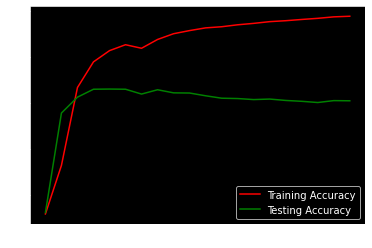

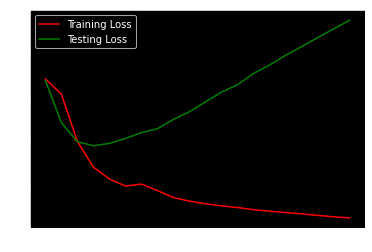

In [61]:
#Evaluating Accuracy and Loss of the model
%matplotlib inline
acc=history1.history['accuracy']
val_acc=history1.history['val_accuracy']
loss=history1.history['loss']
val_loss=history1.history['val_loss']

epochs=range(len(acc)) #No. of epochs

#Plot training and validation accuracy per epoch
import matplotlib.pyplot as plt
plt.plot(epochs,acc,'r',label='Training Accuracy')
plt.plot(epochs,val_acc,'g',label='Testing Accuracy')
plt.legend()
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs,loss,'r',label='Training Loss')
plt.plot(epochs,val_loss,'g',label='Testing Loss')
plt.legend()
plt.show()

# Bidirectional Long Short Term Memory (LSTM)

In [62]:
# Building the LSTM model 
model_lstm = tf.keras.Sequential([tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length),
                                tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
                                tf.keras.layers.Dense(6, activation='relu'),
                                tf.keras.layers.Dense(1,activation='sigmoid')
                                ])

In [63]:
model_lstm.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 32)                4224      
_________________________________________________________________
dense_9 (Dense)              (None, 6)                 198       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 7         
Total params: 164,429
Trainable params: 164,429
Non-trainable params: 0
_________________________________________________________________


In [64]:
model_lstm.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
num_epochs = 20
history2=model_lstm.fit(padded, train_labels, batch_size=512,epochs=num_epochs, validation_data=(test_padded, test_labels))

Epoch 1/20
47/47 [==============================] - 35s 691ms/step - loss: 0.6887 - accuracy: 0.5347 - val_loss: 0.6783 - val_accuracy: 0.5616
Epoch 2/20
47/47 [==============================] - 33s 708ms/step - loss: 0.6571 - accuracy: 0.5659 - val_loss: 0.5546 - val_accuracy: 0.7278
Epoch 3/20
47/47 [==============================] - 34s 719ms/step - loss: 0.5000 - accuracy: 0.7811 - val_loss: 0.4200 - val_accuracy: 0.8229
Epoch 4/20
47/47 [==============================] - 33s 713ms/step - loss: 0.3075 - accuracy: 0.8967 - val_loss: 0.3682 - val_accuracy: 0.8368
Epoch 5/20
47/47 [==============================] - 32s 686ms/step - loss: 0.2351 - accuracy: 0.9129 - val_loss: 0.3811 - val_accuracy: 0.8443
Epoch 6/20
47/47 [==============================] - 32s 692ms/step - loss: 0.1851 - accuracy: 0.9345 - val_loss: 0.4025 - val_accuracy: 0.8398
Epoch 7/20
47/47 [==============================] - 33s 705ms/step - loss: 0.1503 - accuracy: 0.9496 - val_loss: 0.4363 - val_accuracy: 0.8311

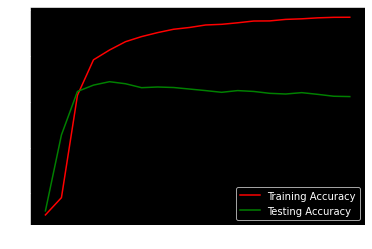

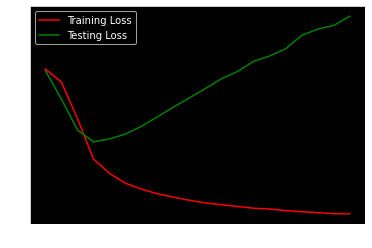

In [65]:
#Evaluating Accuracy and Loss of the model
%matplotlib inline
acc=history2.history['accuracy']
val_acc=history2.history['val_accuracy']
loss=history2.history['loss']
val_loss=history2.history['val_loss']

epochs=range(len(acc)) #No. of epochs

#Plot training and validation accuracy per epoch
import matplotlib.pyplot as plt
plt.plot(epochs,acc,'r',label='Training Accuracy')
plt.plot(epochs,val_acc,'g',label='Testing Accuracy')
plt.legend()
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs,loss,'r',label='Training Loss')
plt.plot(epochs,val_loss,'g',label='Testing Loss')
plt.legend()
plt.show()